# Acquisitor and Cleaner

Download the product data.

Concatenate first(name) and second(description) column, using it as our feature column.

Drop the first and second columns.

In [53]:
from marvin_python_toolbox.common.data import MarvinData
import pandas as pd


In [54]:

initial_dataset = pd.read_csv(MarvinData.download_file("https://s3.amazonaws.com/automl-example/produtos.csv"), delimiter=";", encoding='utf-8')
initial_dataset["text"] = initial_dataset["nome"] + " " + initial_dataset["descricao"]
initial_dataset.drop(["descricao", "nome"], axis=1, inplace=True)
initial_dataset.dropna(inplace=True)

marvin_initial_dataset = initial_dataset

Some details about our initial_dataset below

In [55]:
initial_dataset.head()

,categoria,text
0,livro,O Hobbit - 7ª Ed. 2013 Produto NovoBilbo Bol...
1,livro,Livro - It A Coisa - Stephen King Produto No...
2,livro,Box As Crônicas De Gelo E Fogo Pocket 5 Li...
3,livro,Box Harry Potter Produto Novo e Físico A sé...
4,livro,Livro Origem - Dan Brown Produto NovoDe Onde...


In [56]:
marvin_initial_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2916 entries, 0 to 4079
Data columns (total 2 columns):
categoria    2916 non-null object
text         2916 non-null object
dtypes: object(2)
memory usage: 68.3+ KB


In [57]:
marvin_initial_dataset.categoria.value_counts()

livro        838
maquiagem    788
brinquedo    668
game         622
Name: categoria, dtype: int64

# Visualization

Livro text visualization for example, can be applied in others labels to compare the frequency of words

In [58]:
import nltk

livro_words = ''

livro = initial_dataset[initial_dataset.categoria == 'livro']

In [59]:
from nltk.corpus import stopwords

for val in livro.text:
    text = val.lower()
    tokens = nltk.word_tokenize(text)
    tokens = [word for word in tokens if word not in stopwords.words('portuguese')]
    for words in tokens:
        livro_words = livro_words + words + ' '

In [60]:
from wordcloud import WordCloud

# Generate a word cloud image
livro_wordcloud = WordCloud(width=600, height=400).generate(livro_words)

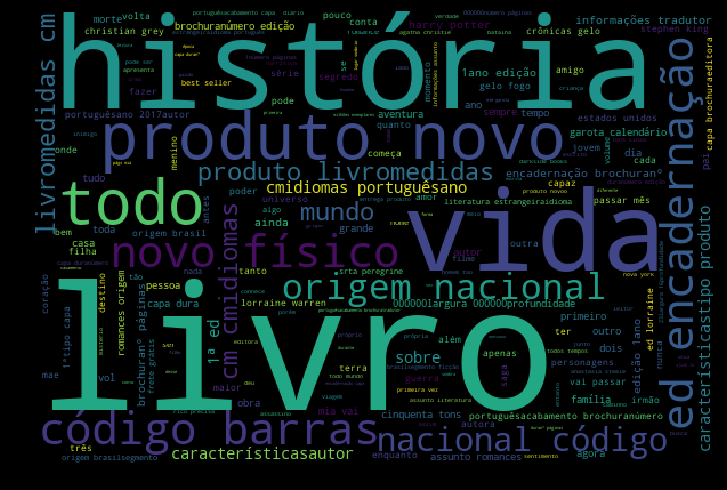

In [61]:
import matplotlib.pyplot as plt

#Livro Word cloud
plt.figure( figsize=(10,8), facecolor='k')
plt.imshow(livro_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

# Training Preparator

Split text and label datas in test and train proportion (80% for training and 20% for test).

Text transformation using sklearn.feature_extraction library.

Convert a collection of text documents to a matrix of token counts, and learn a vocabulary dictionary of all tokens in the raw documents using CountVectorizer.fit()

In [6]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

In [7]:

X_train,X_test,y_train,y_test = train_test_split(
    marvin_initial_dataset["text"], 
    marvin_initial_dataset["categoria"], 
    test_size = 0.2, 
    random_state = 10
)

vect = CountVectorizer()
vect.fit(marvin_initial_dataset["text"])

marvin_dataset = {
    "X_train": vect.transform(X_train),
    "X_test": vect.transform(X_test),
    "y_train": y_train,
    "y_test" : y_test,
    "vect": vect
}

# Trainer

Naive Bayes has good performance for text data

In [8]:
from sklearn.naive_bayes import MultinomialNB

In [9]:

clf = MultinomialNB()
clf.fit(marvin_dataset["X_train"], marvin_dataset["y_train"])

marvin_model = {
    "clf" : clf,
    "vect": marvin_dataset["vect"]
}

# Metrics Evaluator

Prediction accuracy is used to measure the classifier

In [10]:
from sklearn.metrics import accuracy_score

In [11]:

y_prediction = marvin_model["clf"].predict(marvin_dataset["X_test"])

accuracy = accuracy_score(y_prediction, marvin_dataset["y_test"])

print accuracy

marvin_metrics = accuracy

0.979452054795


# Prediction Preparator

Transform documents(input_message) to document-term matrix before going to Predictor.

In [12]:
input_message = ["hobbit"]

In [13]:

input_message = marvin_model["vect"].transform(input_message)

# Predictor

Do prediction

In [14]:
final_prediction = marvin_model["clf"].predict(input_message)[0]

In [15]:
print("Predicted value: " + final_prediction)

Predicted value: livro
